# PyFolding SI Notebook 1
---

[Author] ERGM

---


## Fitting equilibrium & kinetic folding data to simple models

In this notebook we will show how equilbrium and kinetic folding data can be imported into a notebook and fitted to folding models. We also show how you can automate fitting data to a series of models and automate using different starting parameters/variables!

If you are less script/computer orientated, you can simply change the data paths/variables, etc for your proteins and re-run the jupyter notebook ( "Kernal/Restart & Run all" from the menu above).

---

### Data Format

Datasets should be in .csv files where:

1. The 1st row should contain the data titles
2. the 1st column should contain the x-values 
3. The subsequent columns should contain the y-values. 
4. You can have different data sets in different .csv files or all in one (as long as there is only one x-value column).
5. If you wish to perform global analyses on folding or equilibrium data, the datasets concerned must be in the same .csv
6. Except for global analyses using the Ising model, here each dataset must have its own .csv 

---

Example .csv structure:

[Urea] (M)	  | Fraction Unfolded FKBP12
:-----------: | :------------------------:
0	          | -0.00207
0.267	      | 0.00307
...           | ...

---

#### First off lets load pyfolding & pyplot into this ipython notebook (pyplot allows us to plot more complex figures of our results):

---

In [1]:
# use this command to tell Jupyter to plot figures inline with the text
%matplotlib inline

# import pyfolding, the pyfolding models and ising models
import pyfolding
from pyfolding import *

# import the package for plotting, call it plt
import matplotlib.pyplot as plt

# import numpy as well
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

### Now, we need to load some data to analyse.

I will import the equilibrium denaturation & unfolding/folding kinetics of wild-type FKBP12 from:

`Main E.R.G., Fulton K.F. & Jackson S.E. (1999) “The folding pathway of FKBP12 and characterisation of the transition state.” Journal of Molecular Biology, 291, 429-444.`

#### Considerations
1. Kinetics data should be entered as rate constants ( *k* ) and NOT as the `log` of the rate constant.
2. There can be no "empty" x-axis cells in the .csv file for kinetics data.

---


In [2]:
# start by loading a data set
# arguments are "path", "filename"

pth = "../examples/FKBP12/"
Equilm_FKBP12 = pyfolding.read_equilibrium_data(pth,"Equilm_FKBP12.csv")
Kinetics_FKBP12 = pyfolding.read_kinetic_data(pth,"Kinetics_FKBP12.csv")


---

#### Lets plot the data.

---

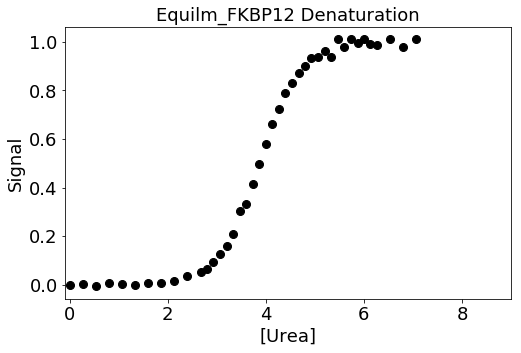

In [3]:
# now plot the equilm data 
Equilm_FKBP12.plot()

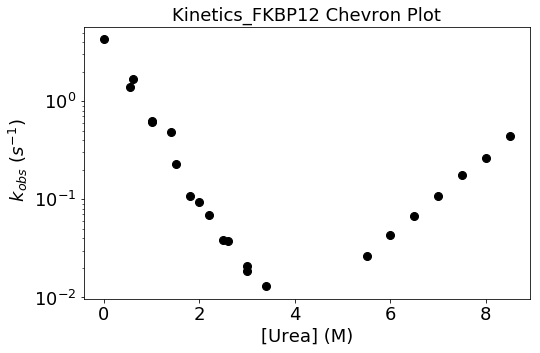

In [4]:
# now the kinetics
Kinetics_FKBP12.plot()

---

#### OK, now we can try fitting the data to protein folding models. 

We will start by fitting the equilibrium data to a two state folding model, without sloping baslines (as the data has been processed as Fraction Unfolded).

#### We can list the models in pyfolding:

---

In [5]:
# Command imports pyfolding models
from pyfolding.models import *

# command lists models
list_models()

# After the model name:
#'Verified: True' - model rigorously tested and it functions as expected.
#'Verified:False' - model tested, but not rigourously.

[('ChevronPolynomialFit', 'Verified: True'),
 ('HeteropolymerIsingEquilibrium', 'Verified: False'),
 ('HomozipperIsingEquilibrium', 'Verified: True'),
 ('ParallelTwoStateChevron', 'Verified: False'),
 ('ParallelTwoStateUnfoldingChevron', 'Verified: False'),
 ('TemplateModel', 'Verified: False'),
 ('ThreeStateChevron', 'Verified: True'),
 ('ThreeStateDimericIEquilibrium', 'Verified: True'),
 ('ThreeStateEquilibrium', 'Verified: True'),
 ('ThreeStateFastPhaseChevron', 'Verified: True'),
 ('ThreeStateMonoIEquilibrium', 'Verified: True'),
 ('ThreeStateSequentialChevron', 'Verified: True'),
 ('TwoStateChevron', 'Verified: True'),
 ('TwoStateChevronMovingTransition', 'Verified: True'),
 ('TwoStateDimerEquilibrium', 'Verified: True'),
 ('TwoStateEquilibrium', 'Verified: True'),
 ('TwoStateEquilibriumSloping', 'Verified: True')]

---
#### We can print out the model for viewing.

---


In [6]:
# print the info
models.TwoStateEquilibrium().info()

<IPython.core.display.Math object>

 Two state equilibrium denaturation curve - No sloping baseline.

    Folding Scheme:
        N <-> D

    Params:
        F = Fraction unfolded
        m = m-value
        x = denaturant concentration (M)
        d50 = denaturant midpoint (M)
        R = Universal Gas Constant (kcal.mol-1.K-1)
        T = Temperature (Kelvin)

    Reference:
        Clarke and Fersht. Engineered disulfide bonds as probes of
        the folding pathway of barnase: Increasing the stability
        of proteins against the rate of denaturation.
        Biochemistry (1993) vol. 32 (16) pp. 4322-4329
    


In [7]:
# Printing the model variables

# The function has two parts:
# part1 states the model you want to find about: "******()"
# part2 prints the variables: ".fit_func_args"

TwoStateEquilibrium().fit_func_args

['m', 'd50']

---

#### Or we can skip straight to fitting the data.

---

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)
Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m        1.43404 ± 0.01994      	 95% CI[     1.42904,      1.43905]
(f) d50      3.86730 ± 0.00642      	 95% CI[     3.86569,      3.86891]
--------------------------------------------------------------------------------
R^2: 	0.99933
DOF: 	39
SS: 	4.84e-03




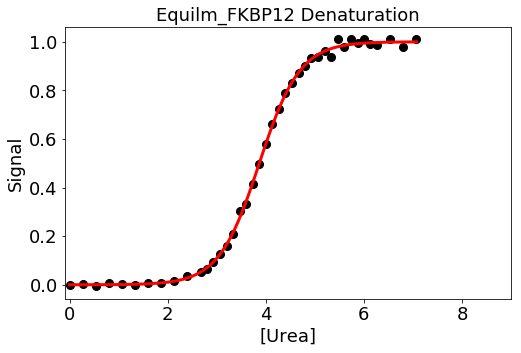

In [9]:
# Set temperature to 25.00°C
# (NOTE: Careful, this sets the temperature for all subsequent calculations)
pyfolding.set_temperature(25.)

#1st select the fit function and associates it with the data
Equilm_FKBP12.fit_func = models.TwoStateEquilibrium

#then fit it. 
#in the brackets you can define starting values for the variables -
#input in the order printed above with the".fit_func_args'
Equilm_FKBP12.fit(p0=[2,4])

# We can print the resultant graph using either of these commands:
# 1. "Equilm_FKBP12.plot()" or 
# 2. "pyfolding.plot_equilibrium(Equilm_FKBP12)"

# lets do the first & save out the resultant graph
Equilm_FKBP12.plot(save='/Users/arl/Desktop/test.pdf')

In [ ]:
# save out the fit
Equilm_FKBP12.save_fit('/users/ergm/test.csv')


---

#### We can fit the kinetic data separately too, lets first print the equation we want to use:

---

In [ ]:
# printing the equation for viewing
models.TwoStateChevron().info()

# Lets also see what the input variables are also
models.TwoStateChevron().fit_func_args

---
#### Now we can associate the data with a model and then fit the data to the model
---

In [ ]:
# 1st select the fit function and associates it with the data
Kinetics_FKBP12.fit_func = models.TwoStateChevron

# 2nd fit the data with initial values (input these as per the list of input variables above)
Kinetics_FKBP12.fit(p0=[4,2,0.0001,1])

---

#### We can print the resultant graph:
This is the same as when plotting the Equilm data and the commands are either:
    Kinetics_FKBP12.plot()
    or
    pyfolding.plot_chevron(Kinetics_FKBP12)

Lets use the first

---


In [ ]:
Kinetics_FKBP12.plot(save='/Users/ergm/Desktop/test.pdf')

---

### We can also plot a fancier graph that shows both Equilm and Kinetics together

---

In [ ]:
pyfolding.plot_figure(Equilm_FKBP12, 
                      Kinetics_FKBP12, 
                      display=True, 
                      pth= '/users/ergm/desktop', save=True)

# the "pth" and save=True part writes out a pdf of the figure below.


---

### Fit to multiple models

---

Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m        1.43404 ± 0.01994      	 95% CI[     1.42904,      1.43905]
(f) d50      3.86730 ± 0.00642      	 95% CI[     3.86569,      3.86891]
--------------------------------------------------------------------------------
R^2: 	0.99933
DOF: 	39
SS: 	4.84e-03




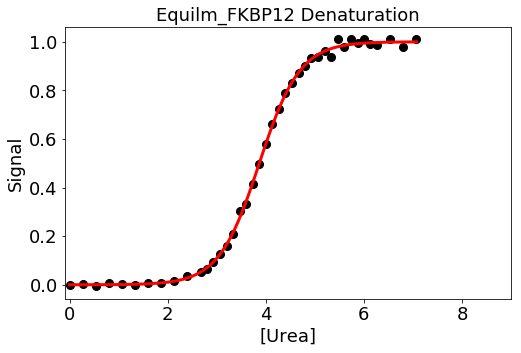

Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibriumSloping
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) alpha_f     -0.00000 ± 0.00690      	 95% CI[    -0.00173,      0.00173]
(f) beta_f      -0.00005 ± 0.00516      	 95% CI[    -0.00134,      0.00124]
(f) alpha_u      0.99945 ± 0.04334      	 95% CI[     0.98859,      1.01031]
(f) beta_u       0.00035 ± 0.00707      	 95% CI[    -0.00142,      0.00212]
(f) m            1.43029 ± 0.04922      	 95% CI[     1.41796,      1.44262]
(f) d50          3.86799 ± 0.01827      	 95% CI[     3.86341,      3.87256]
--------------------------------------------------------------------------------
R^2: 	0.99933
DOF: 	35
SS: 	4.83e-03




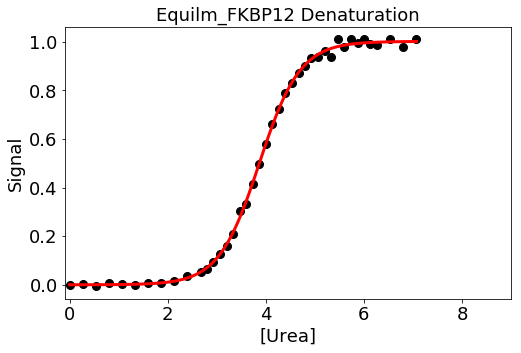

In [10]:
# make a list of models to be used to fit
models_to_fit = [models.TwoStateEquilibrium, 
                 models.TwoStateEquilibriumSloping]

# and now lets fit them
for model in models_to_fit:
    Equilm_FKBP12.fit_func = model
    Equilm_FKBP12.fit()   
    Equilm_FKBP12.plot()

---

#### As you can see, each of the models has found a good fit with the default initial variables.

---

### We can also get PyFolding to iterate over a range of initial parameters used (incase, for example, fitting your data is very dependent on your starting parameters).

---


In [11]:
#1st select the fit function and associates it with the data
Equilm_FKBP12.fit_func = models.TwoStateEquilibrium

# iterate over some different parameters
for m in xrange(1,3):
    for d50 in xrange (2,4):
        Equilm_FKBP12.fit(p0=[m,d50])

Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m        1.43404 ± 0.01994      	 95% CI[     1.42904,      1.43905]
(f) d50      3.86730 ± 0.00642      	 95% CI[     3.86569,      3.86891]
--------------------------------------------------------------------------------
R^2: 	0.99933
DOF: 	39
SS: 	4.84e-03


Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m        1.43404 ± 0.01994      	 95% CI[     1.42904,      1.43905]
(f) d50      3.86730 ± 0.00642      	 95% CI[     3.86569,      3.86891]
--------------------------------------------------------------------------------
R^2: 	0.99933
DOF: 	39
SS: 	4.84e-03


Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m        1.43404 ± 0.01994      	 9

---

### End of this Notebook.

---